In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2]  = 1
A[1::2, 1::2] = 1
B = np.arange(1, 25).reshape((6, 4))
C = np.random.randint(2, 11, size=(4, 3))
D = np.eye(4)

S = np.block([[A, B], [C, D]])

F = np.zeros((10, 2))

G = np.hstack((S, F))

A,B,C,D,S,F,G

(array([[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]]),
 array([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]),
 array([[7, 5, 7],
        [6, 5, 2],
        [3, 6, 7],
        [2, 9, 5]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[ 1.,  0.,  1.,  1.,  2.,  3.,  4.],
        [ 0.,  1.,  0.,  5.,  6.,  7.,  8.],
        [ 1.,  0.,  1.,  9., 10., 11., 12.],
        [ 0.,  1.,  0., 13., 14., 15., 16.],
        [ 1.,  0.,  1., 17., 18., 19., 20.],
        [ 0.,  1.,  0., 21., 22., 23., 24.],
        [ 7.,  5.,  7.,  1.,  0.,  0.,  0.],
        [ 6.,  5.,  2.,  0.,  1.,  0.,  0.],
        [ 3.,  6.,  7.,  0.,  0.,  1.,  0.],
        [ 2.,  9.,  5.,  0.,  0.,  0.,  1.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_nearest_neighbour(X, a):
    raznost = np.abs(X - a)
    index = np.argmin(raznost)
    nearest_value = X.flat[index]
    return nearest_value

X = np.arange(0, 10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
M = np.power(10, 3)
N = np.power(10, 5)
A = np.random.normal(size=(M, N))
b = np.random.normal(size=M)
X = np.random.normal(size=N)

def very_strange_neural_network(A, b, X):
    A = np.power(A, 2)
    X = A @ X
    return X.T @ b
print(very_strange_neural_network(A, b, X))

-21904.300865329245


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M < 0]))

def find_max_height(M):
    return np.max(M[M > 0])

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    return np.sum(np.concatenate(([a[0] == 1], np.diff(a) == 1)))

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    avrg = np.mean(X)
    X[X > a] = avrg
    return X

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    diagonal = np.trace(M)
    diagonal_two = np.trace(np.fliplr(M))
    return diagonal - diagonal_two


In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    n = a.shape[0]
    A = a[np.newaxis, :] + np.arange(0, n)[:, np.newaxis]
    AB = np.hstack((A, np.flip(A, axis=1)))
    return np.vstack((AB, np.flip(AB, axis=0)))

In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:

def custom_blur(P, C):
    N, M = P.shape
    strided_P = np.lib.stride_tricks.as_strided(
        P,
        shape=(N - C + 1, M - C + 1, C, C),
        strides=P.strides + P.strides
    )
    return np.mean(strided_P, axis=(2, 3))


In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
    def can_broadcast(shape1, shape2):
        for s1, s2 in zip(shape1[::-1], shape2[::-1]):
            if s1 != s2 and s1 != 1 and s2 != 1:
                return False
        return True

    cur_shape = matrices[0]
    for shape in matrices[1:]:
        if not can_broadcast(cur_shape, shape):
            return False
        cur_shape = tuple(
            max(s1, s2) for s1, s2 in zip(cur_shape[::-1], shape[::-1])
        )[::-1]

    return True


In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах
assert check_successful_broadcast((5, 6), (6,))


## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
   return np.sqrt(((A[:, np.newaxis] - B) ** 2).sum(axis=2))

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

pairwise_distances(A, B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

*Объясни* принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>
Чтобы посчитать Евклидово расстояние между двумя строками матриц возьмем broadcasting.
A[:, np.newaxis, :] преобразовывает матрицу A размера m x n в матрицу размера m x 1 x n для broadcasting с матрицей B размера n x k. Создали матрицу размера m x n x k, где каждый элемент это разность между A и B. Дальше возводим в квадрат это все и суммируем квадраты по оси k, получая сумму квадратов разностей строк. И после вычисляем квадратный корень из этого. \\
На выходе получаем матрицy m x n, где i, j — евклидово расстояние между i-й строкой A и j-й строкой B

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

**Для** начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
# YOUR CODE HERE
data = pd.read_csv('/content/data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [ ]:
data['t'] = data['t, sec']
data['mass'] = data['mass, gramm'] / 1000
data['length'] = data['length, cm'] / 100
data['phi'] = data['phi, rad']
data['sigma_t'] = data['sigma_t, sec']
data.drop(['t, sec', 'mass, gramm', 'length, cm', 'phi, rad', 'sigma_t, sec', 'Unnamed: 0'], axis=1, inplace=True)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

,N,t,mass,length,phi,sigma_t
0,4,268,0.18,1.21,0.16,1
1,4,264,0.18,1.21,0.18,1
2,4,275,0.18,1.21,0.16,1
3,4,263,0.18,1.21,0.17,1
4,4,267,0.18,1.21,0.17,1


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
data['omega'] = 2 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] / data['t'] * data['sigma_t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_down'] = data['sigma_t'] / data['t']
data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = (data['mass'] * data['phi'] * data['length'] ** 2) / data['t'] ** 2
data['sigma_momentum'] = data['momentum_down'] * 2 * data['sigma_t'] / data['t']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


,N,t,mass,length,phi,sigma_t,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,0.18,1.21,0.16,1,0.093779,0.000350,0.000597,0.003731,2.13444,5.870751e-07,4.381157e-09
1,4,264,0.18,1.21,0.18,1,0.095200,0.000361,0.000682,0.003788,2.13444,6.806250e-07,5.156250e-09
2,4,275,0.18,1.21,0.16,1,0.091392,0.000332,0.000582,0.003636,2.13444,5.575680e-07,4.055040e-09
3,4,263,0.18,1.21,0.17,1,0.095562,0.000363,0.000646,0.003802,2.13444,6.477101e-07,4.925552e-09
4,4,267,0.18,1.21,0.17,1,0.094130,0.000353,0.000637,0.003745,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [ ]:
# YOUR CODE HERE
grouped_data = data.groupby('mass')[['omega', 'omega_down','sigma_omega', 'sigma_down', 'sigma_momentum', 'momentum', 'momentum_down']].mean()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,omega,omega_down,sigma_omega,sigma_down,sigma_momentum,momentum,momentum_down
mass,,,,,,,
0.142,0.066661,0.000559,0.000236,0.003536,2.906917e-09,1.683836,4.108862e-07
0.180,0.094012,0.000629,0.000352,0.003741,4.645096e-09,2.134440,6.202853e-07
0.216,0.081687,0.000710,0.000354,0.004334,6.721701e-09,2.286144,7.755223e-07
0.273,0.143300,0.000935,0.000817,0.005702,2.470970e-08,3.263988,2.166527e-06
0.341,0.150752,0.000797,0.000723,0.004799,1.514038e-08,3.675980,1.577406e-06
0.614,0.185194,0.000815,0.000910,0.004912,2.978946e-08,6.679092,3.030996e-06


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

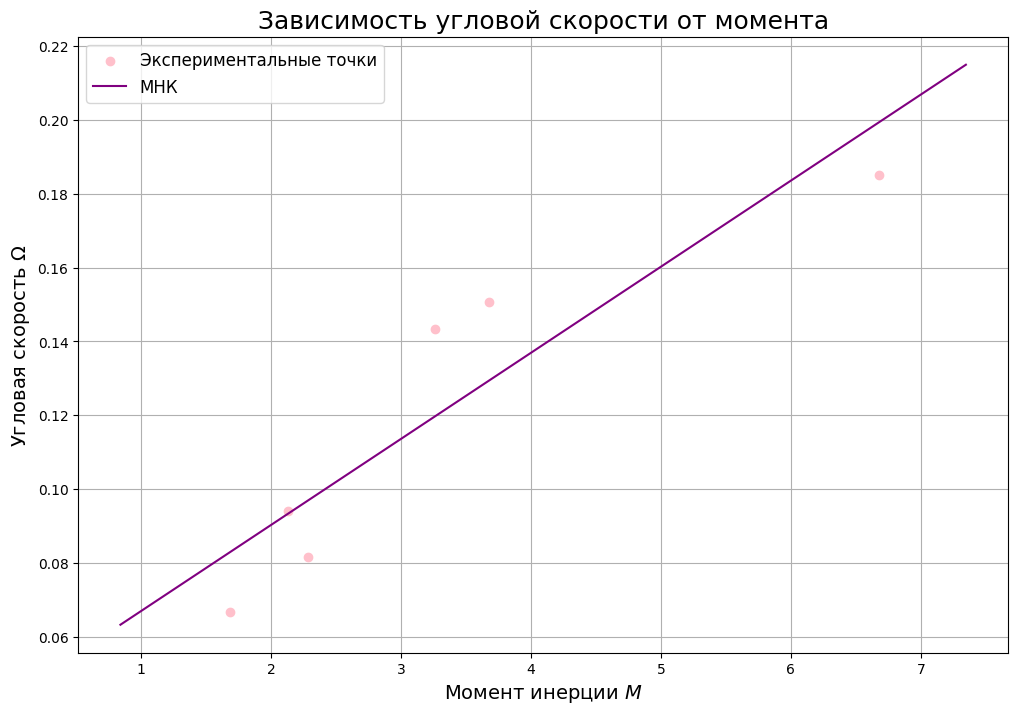

In [ ]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
coefs = np.polyfit(momentum_np, omega_np, deg=1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))
plt.scatter(momentum_np, omega_np, color='pink', label='Экспериментальные точки')
plt.plot(x_lsq, y_lsq, color='purple', label=f'МНК')
plt.xlabel('Момент инерции $M$', fontsize=14)
plt.ylabel('Угловая скорость $\\Omega$', fontsize=14)
plt.title('Зависимость угловой скорости от момента', fontsize=18)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

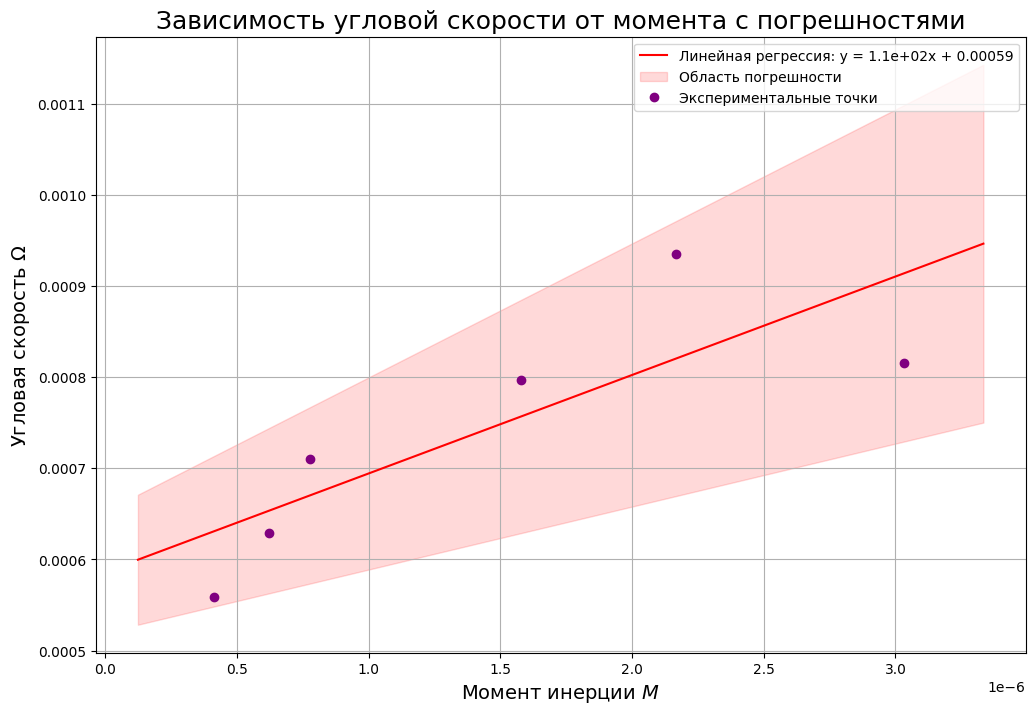

In [ ]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

# Снова polyfit, но с дополнительным параметром и возвращающий ковариацию!
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, cov=True)

# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Посчитайте корень диагональных элементов, должен получиться массив размером (2,)
lsq_stds = np.sqrt(np.diag(cov))

# Знакомый polyfit, но три раза
y_lsq = np.polyval(coefs, x_lsq)
y_lsq_lower = np.polyval([coefs[0] - lsq_stds[0], coefs[1] - lsq_stds[1]], x_lsq)
y_lsq_upper = np.polyval([coefs[0] + lsq_stds[0], coefs[1] + lsq_stds[1]], x_lsq)

# YOUR CODE HERE
fig = plt.figure(figsize=(12, 8))

plt.errorbar(momentum_down_np, omega_down_np, fmt='o', label='Экспериментальные точки', color='purple')
plt.plot(x_lsq, y_lsq, label=f'Линейная регрессия: y = {coefs[0]:.2}x + {coefs[1]:.2}', color='red')
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='r', alpha=0.15, label='Область погрешности')

plt.xlabel(r'Момент инерции $M$', fontsize=14)
plt.ylabel(r'Угловая скорость $\Omega$', fontsize=14)
plt.title('Зависимость угловой скорости от момента с погрешностями', fontsize=18)

plt.grid(True)
plt.legend()
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris = iris.frame

iris = iris.rename(
    columns={
        "sepal length (cm)": "SepalLengthCm",
        "sepal width (cm)": "SepalWidthCm",
        "petal length (cm)": "PetalLengthCm",
        "petal width (cm)": "PetalWidthCm",
        "target": "Species",
    }
)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# TODO
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
iris['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

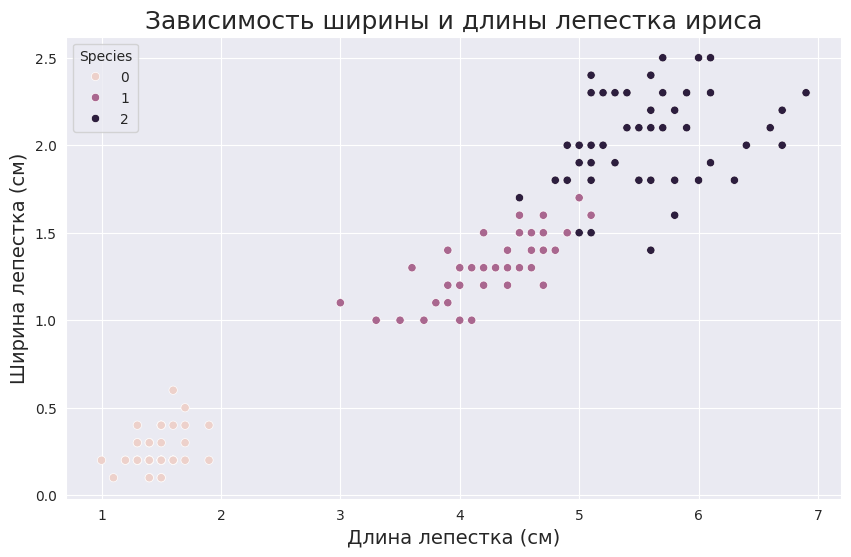

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris)
plt.xlabel('Длина лепестка (см)', fontsize=14)
plt.ylabel('Ширина лепестка (см)', fontsize=14)
plt.title('Зависимость ширины и длины лепестка ириса', fontsize=18)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>
По нашему графику трудно понять различие между 1 и 2 классом поэтому лучше использовать иной график для этого. Но все же мы можем увидеть, что 0 класс линейно отделим от других классов, но даже так такой способ показания плотности точек не совсем идеален.

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

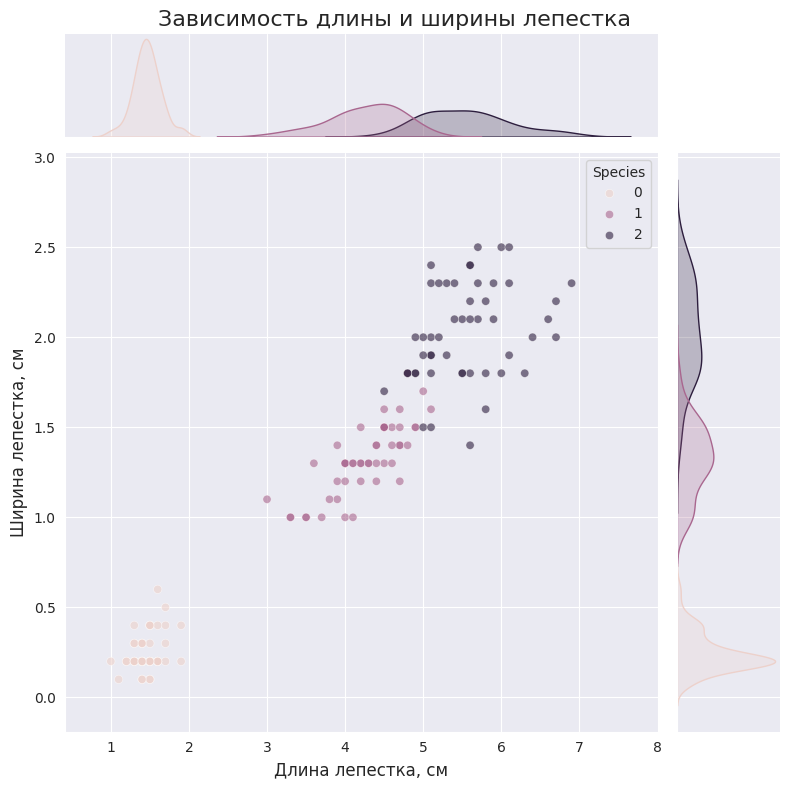

In [ ]:
#TODO
g = sns.jointplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', kind='scatter', height=8, alpha=0.6)

g.set_axis_labels('Длина лепестка, см', 'Ширина лепестка, см', fontsize=12)
g.fig.suptitle('Зависимость длины и ширины лепестка', fontsize=16)

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

plt.show()

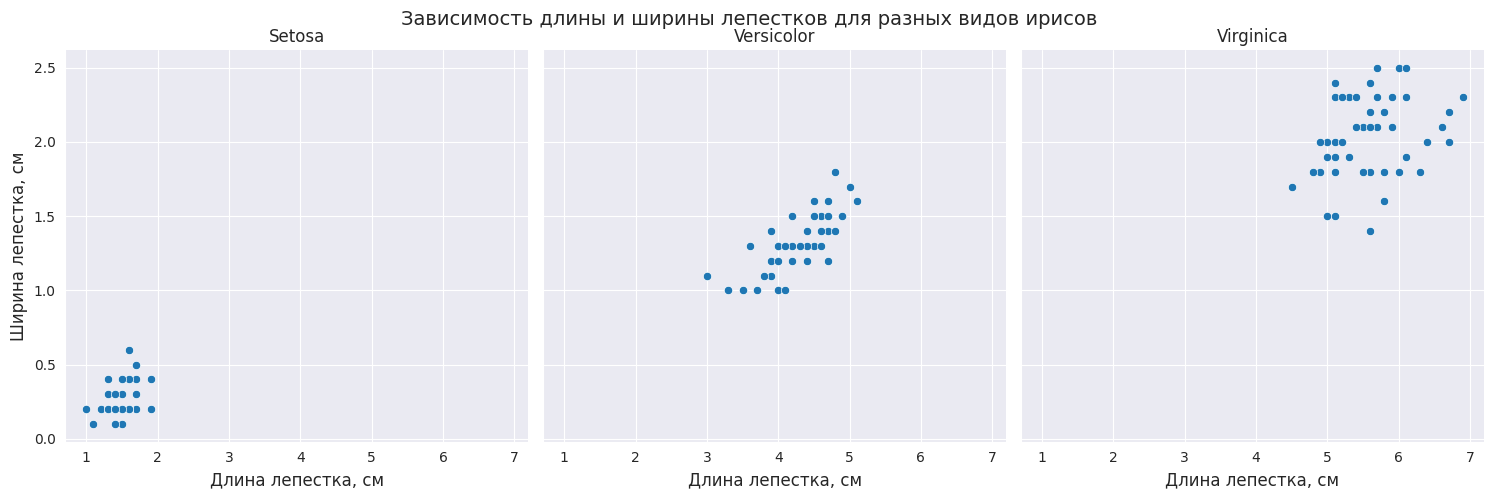

In [ ]:
target_names = [
    'Setosa',
    'Versicolor',
    'Virginica'
]

g = sns.FacetGrid(iris, col="Species", height=5)
g.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm")

g.fig.suptitle('Зависимость длины и ширины лепестков для разных видов ирисов', fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

g.set_axis_labels('Длина лепестка, см', 'Ширина лепестка, см', fontsize=12)

for ax, title in zip(g.axes.flat, target_names):
    ax.set_title(title, fontsize=12)

plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font> \
График jointplot позволяет увидеть как распределяются данные, а также оценить взаимосвязь между двумя переменными, добавляя плотности распределения по осям. Это позволяет выделить, насколько сильно пересекаются распределения различных видов ирисов. Как видно из графика, существует пересечение точек классов 1 и 2 на около 30% общей площади, что делает задачу линейной классификации более сложной, но все же возможно сделать правильные выводы, если точка окажется на краю одного из классов. Визуально можно предположить, что класс 0 (Setosa) имеет более четкое разделение от других классов, и его распределение напоминает нормальное, в то время как для классов 1 и 2 разделение менее очевидно.
\
График facetgrid отображает данные для каждого класса ириса в отдельных подграфиках. Хотя он дает представление о том, как распределяются данные для каждого вида, для задачи линейной отделимости он оказывается менее информативным. В данной ситуации гораздо удобнее использовать один общий график, где разные виды отмечены разными цветами, чтобы сразу видеть взаимосвязь между переменными.
\
Итог
\
jointplot выглядит наиболее подходящим инструментом для визуализации и анализа зависимости между длиной и шириной лепестка, а также для оценки возможности разделения классов.


## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

In [ ]:
# TODO

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

In [ ]:
# TODO

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

In [ ]:
# TODO

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>